##### EXERCÍCIO AVALIATIVO 06: Propagação de doenças

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from PIL import Image
import imageio
import os

In [2]:
#HEALTHY = 0
#INFECTED = 1
#RECOVERED = 2

In [3]:
def initialize_network(size):
    network = np.zeros((size, size), dtype=int)
    infected_individual = np.random.randint(0, size**2)
    network.flat[infected_individual] = 1 
    return network

In [4]:
def sir_simulation(size, p_infection, p_recovery, num_steps):
    network = initialize_network(size)
    history = []

    for step in range(num_steps):
        new_network = network.copy()

        for i in range(size):
            for j in range(size):
                if network[i, j] == 0:  # Indivíduo suscetível
                    neighbors = [
                        network[(i - 1) % size, j],
                        network[(i + 1) % size, j],
                        network[i, (j - 1) % size],
                        network[i, (j + 1) % size]
                    ]

                    # Regras do modelo SIR
                    if 1 in neighbors and np.random.rand() < p_infection:
                        new_network[i, j] = 1  # infecta individuo
                elif network[i, j] == 1:  # Indivíduo infectado
                    if np.random.rand() < p_recovery:
                        new_network[i, j] = 2  # recupera individuo

        network = new_network
        history.append(network.copy())

    return np.array(history)

In [5]:
# Parâmetros da simulação
size = 20
p_infection_values = [0.1, 0.3, 0.5]  # Escolha livremente
p_recovery_values = [0.05, 0.1, 0.2]  # Escolha livremente
num_simulations = 10
num_steps = 50

cm = plt.get_cmap('Set2')

**01. Médias das populações**

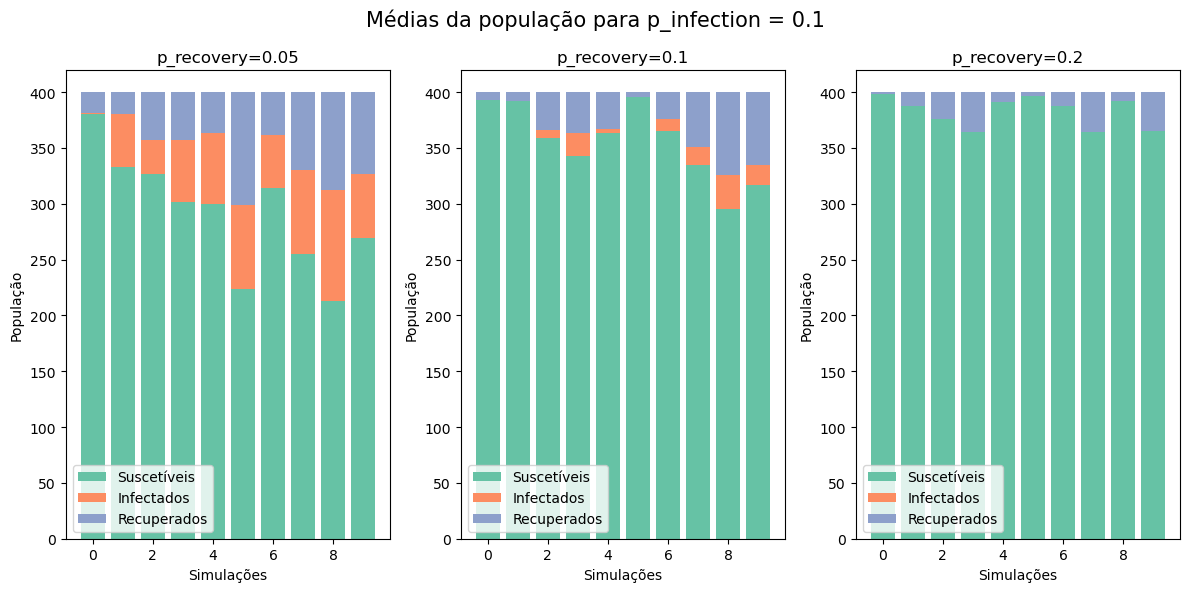

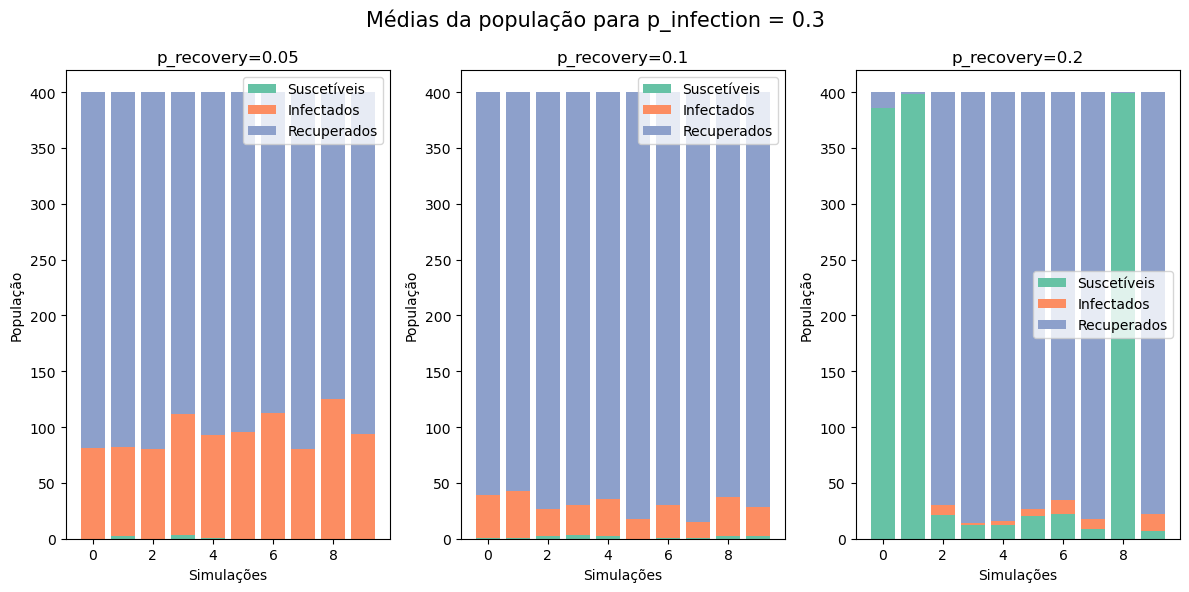

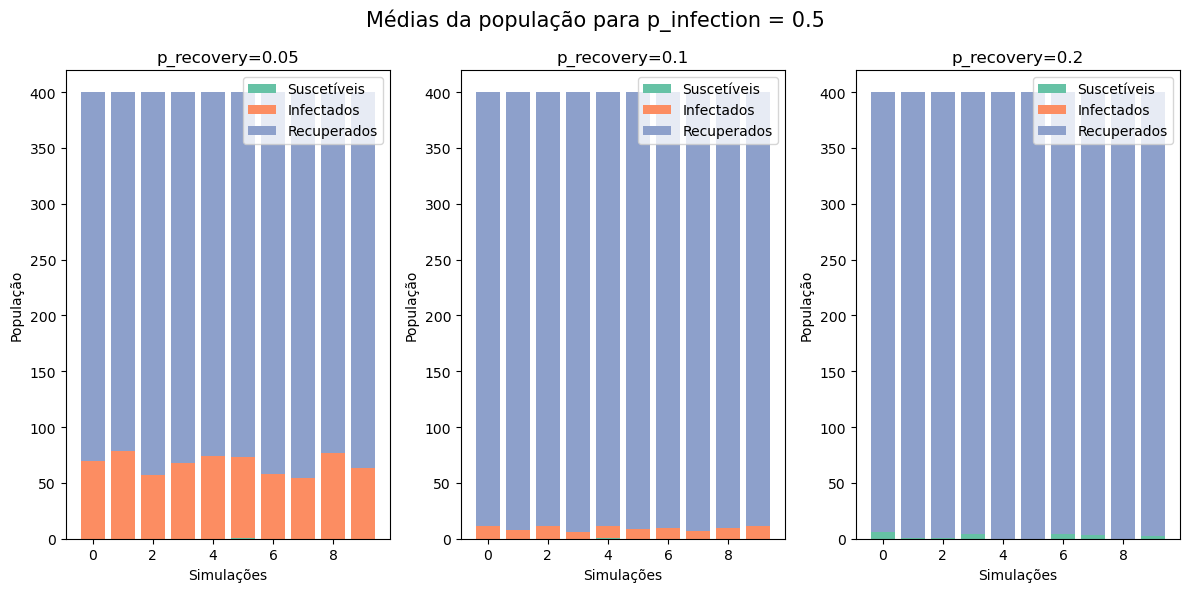

In [11]:
for p_infection in p_infection_values:
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    fig.suptitle(f'Médias da população para p_infection = {p_infection}', fontsize=15),
    
    output_directory = "sir_last_simulations"
    os.makedirs(output_directory, exist_ok=True)
    
    for i, p_recovery in enumerate(p_recovery_values):
        average_populations = np.zeros((num_simulations, 3))
        
        history = []
        for sim in range(num_simulations):
            history = sir_simulation(size, p_infection, p_recovery, num_steps)
            final_state = history[-1]
            
            s_population = np.sum(final_state == 0)
            i_population = np.sum(final_state == 1)
            r_population = np.sum(final_state == 2)
            average_populations[sim] = [s_population, i_population, r_population]
            
        fig_anim, ax_anim = plt.subplots(figsize=(6, 4))
        cmap = mcolors.ListedColormap(['white', cm(1), cm(2)])
        bounds = [0, 1, 2, 3]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)
        frames = []
            
        for frame in range(len(history)):
            ax_anim.clear()
            ax_anim.imshow(history[frame], cmap=cmap, norm=norm)
            ax_anim.set_title(f'Time: {frame}')
            fig_anim.canvas.draw()

            # Convert figure to PIL Image and append to frames
            image = Image.frombytes('RGB', fig_anim.canvas.get_width_height(), fig_anim.canvas.tostring_rgb())
            frames.append(image)
            
        # Save frames as animated GIF
        gif_filename = f'sir_simulation_{p_infection}_{p_recovery}-last.gif'
        gif_path = os.path.join(output_directory, gif_filename)
        imageio.mimsave(gif_path, frames, duration=0.5)

        plt.close(fig_anim)
        
        # Plot population evolution
        axes[i].bar(np.arange(num_simulations), average_populations[:, 0], color = cm(0), label='Suscetíveis')
        axes[i].bar(np.arange(num_simulations), average_populations[:, 1], bottom=average_populations[:, 0], color = cm(1), label='Infectados')
        axes[i].bar(np.arange(num_simulations), average_populations[:, 2], bottom=average_populations[:, 0] + average_populations[:, 1], color = cm(2), label='Recuperados')
        axes[i].set_xlabel('Simulações')
        axes[i].set_ylabel('População')
        axes[i].set_title(f'p_recovery={p_recovery}')
        axes[i].legend(loc='best')

        
    plt.tight_layout()
    plt.show()

**02. Comportamento geográfico na rede**

https://www.dropbox.com/scl/fo/qyq3g55v1hkd3ixvdeu98/h?rlkey=7wl12o37z2b7g6295zcfaf1y7&dl=0